In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

In [2]:
# Step 1: Load the dataset 
df = pd.read_csv("test.csv") 

In [3]:
# Step 2: Data preprocessing
# Drop irrelevant columns
df = df.drop(["Product_id", "Customer_name", "instock_date"], axis=1)

In [4]:
# Handle missing values (if any)
df = df.dropna() 

In [5]:
# Convert categorical variables to numerical representation
label_encoder = LabelEncoder()
df["Loyalty_customer"] = label_encoder.fit_transform(df["Loyalty_customer"])
df["Product_Category"] = label_encoder.fit_transform(df["Product_Category"])

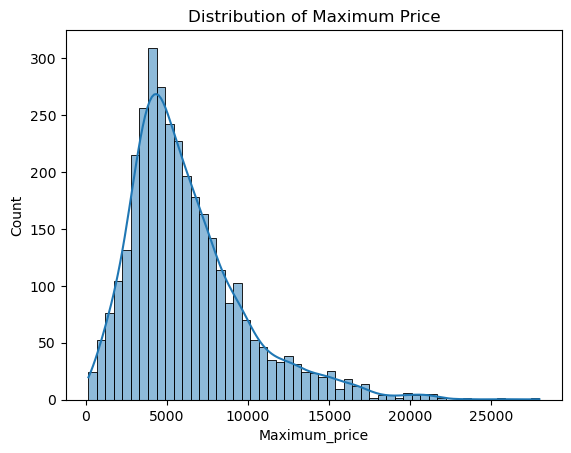

In [6]:
# Explore and visualize the data
# Visualize the distribution of the target variable (Maximum_price)
sns.histplot(data=df, x="Maximum_price", kde=True)
plt.title("Distribution of Maximum Price")
plt.show()

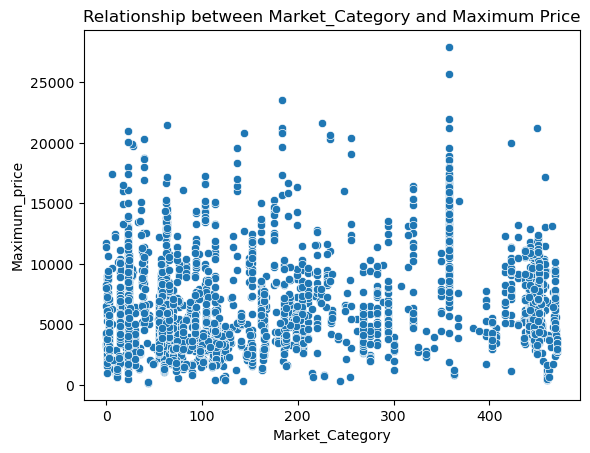

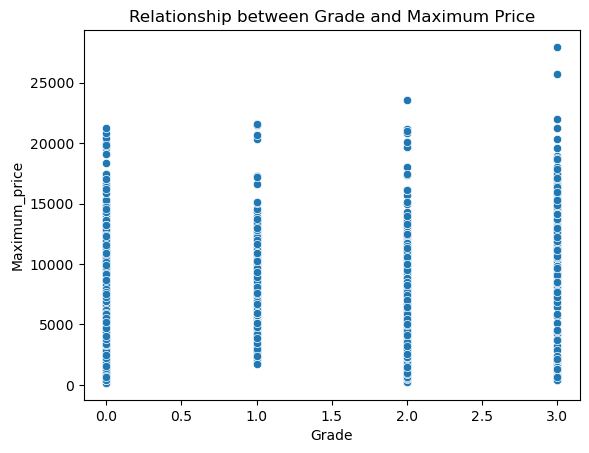

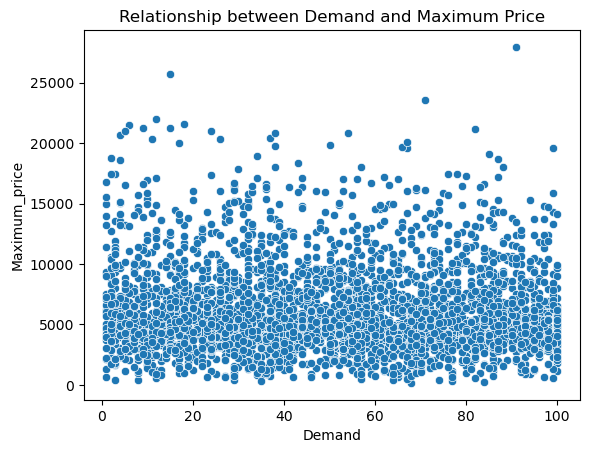

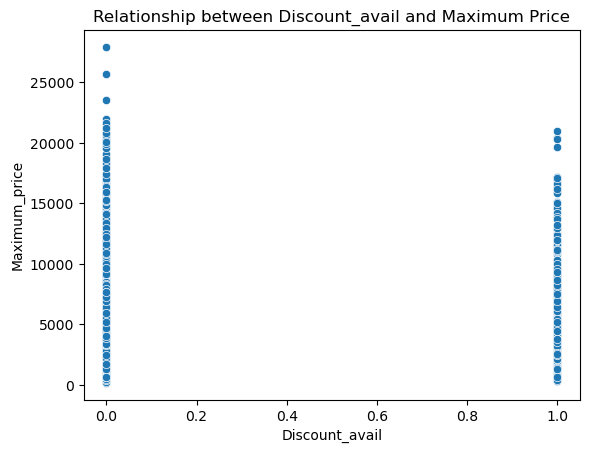

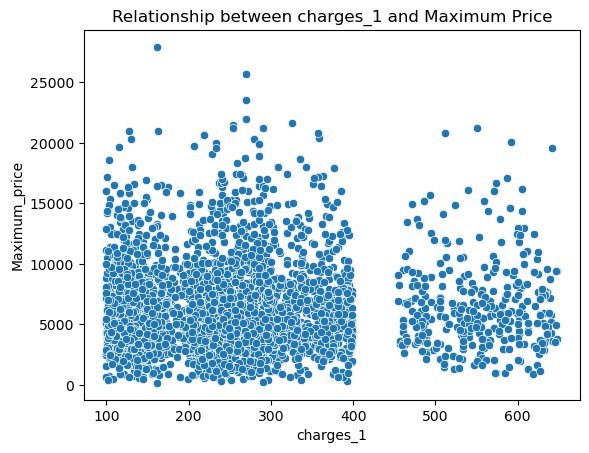

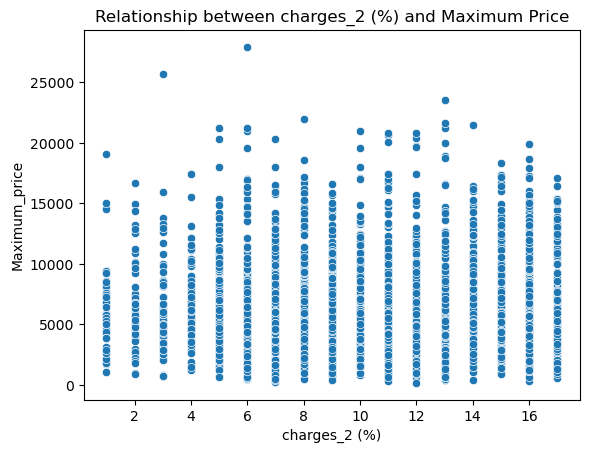

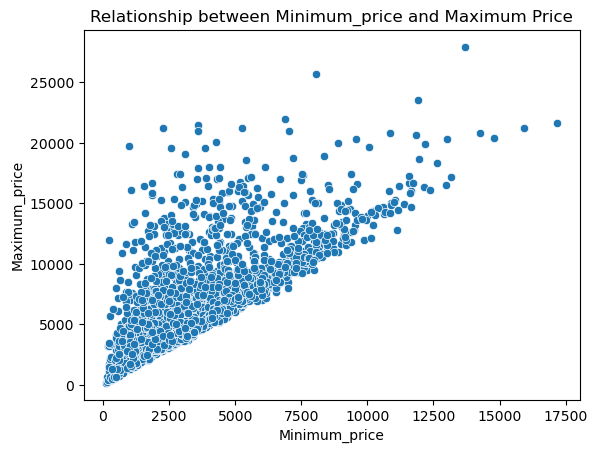

In [7]:
# Visualize the relationship between numerical features and the target variable
numerical_features = ["Market_Category", "Grade", "Demand", "Discount_avail", "charges_1", "charges_2 (%)", "Minimum_price"]
for feature in numerical_features:
    sns.scatterplot(data=df, x=feature, y="Maximum_price")
    plt.title(f"Relationship between {feature} and Maximum Price")
    plt.show()

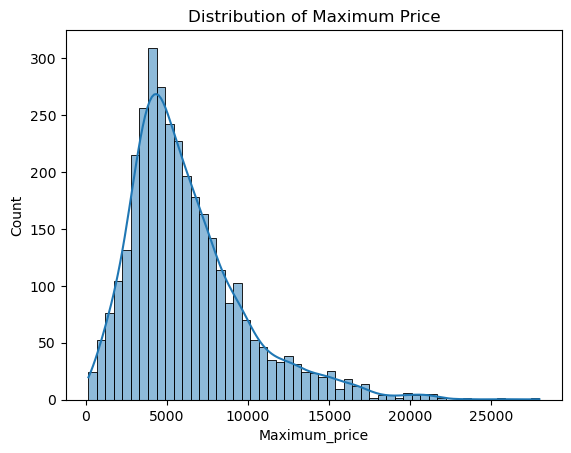

In [8]:
# Explore and visualize the data
# Visualize the distribution of the target variable (Maximum_price)
sns.histplot(data=df, x="Maximum_price", kde=True)
plt.title("Distribution of Maximum Price")
plt.show()


In [9]:
# Split the data into training and testing sets
X = df.drop("Maximum_price", axis=1)  # Input features
y = df["Maximum_price"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [12]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)

Root Mean Squared Error (RMSE): 2445.927402023207
R-squared: 0.5733060508631739


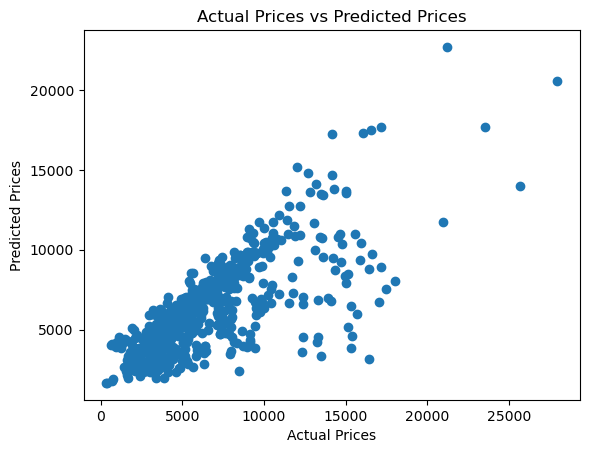

In [14]:
# Additional graphs
# Visualize the predicted prices against the actual prices in the testing set
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

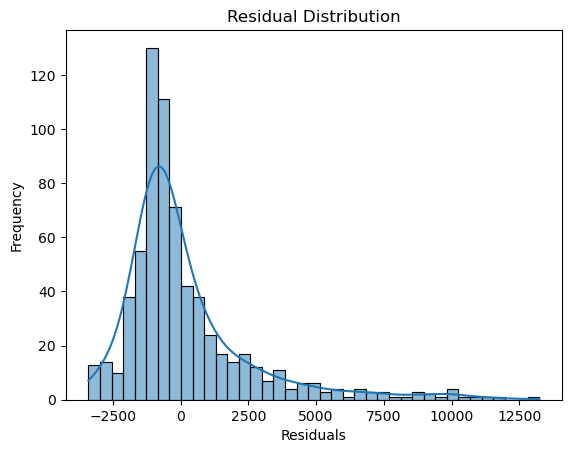

In [15]:
# Visualize the residuals
residuals = y_test - y_pred
sns.histplot(data=residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

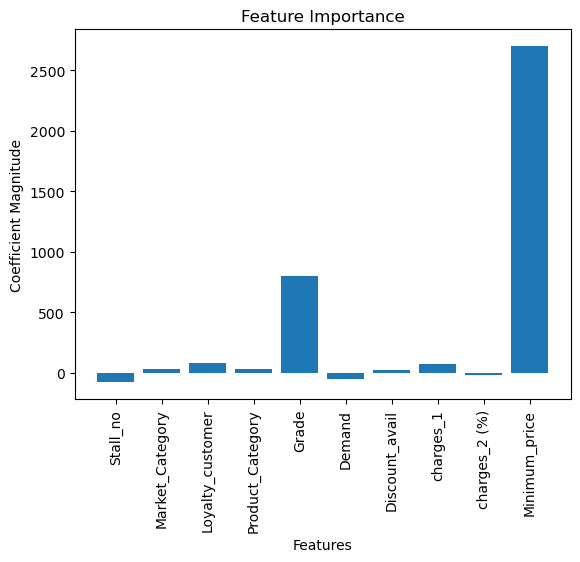

In [16]:
# Visualize feature importance (coefficients)
feature_importance = model.coef_
feature_names = X.columns
plt.bar(feature_names, feature_importance)
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.title("Feature Importance")
plt.xticks(rotation=90)
plt.show()